In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df=pd.read_csv('Salary_cleaned.csv')

In [62]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,1,data scientist,na,2728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,0,190,0,0,0,1,0,na,senior,6162
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,0,14,1,0,1,1,0,data engineer,senior,6130
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,1,36,0,0,0,0,1,na,na,3078
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,-1,0,0,0,0,1,manager,na,1642


In [63]:
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Competitors, Length: 742, dtype: int64

In [64]:
df['min_salary']=df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)

In [65]:
df['max_salary']=df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1)

In [66]:
df[df.hourly==1][['hourly','max_salary','min_salary']]

,hourly,max_salary,min_salary
165,1,48,34
177,1,68,42
197,1,50,36
202,1,68,42
210,1,50,30
246,1,48,34
271,1,68,42
337,1,50,36
345,1,78,48
357,1,68,42


In [67]:
df.describe()

,Rating,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,1.053908,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822
std,0.801210,497.183763,1.384239,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000
50%,3.700000,1988.000000,0.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000
75%,4.000000,2007.000000,3.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000
max,5.000000,2019.000000,4.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000


In [68]:
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Competitors, Length: 742, dtype: int64

In [69]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority',
       'desc_len'],
      dtype='object')

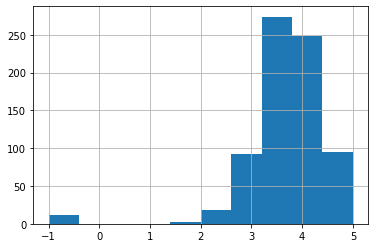

In [71]:
df['Rating'].hist()

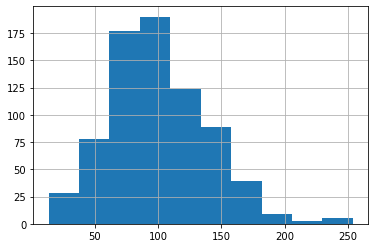

In [72]:
df['avg_salary'].hist()

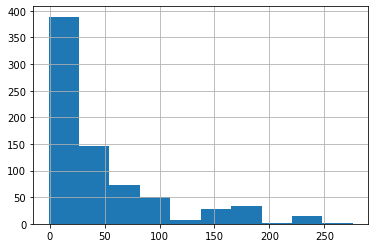

In [73]:
df['age'].hist()

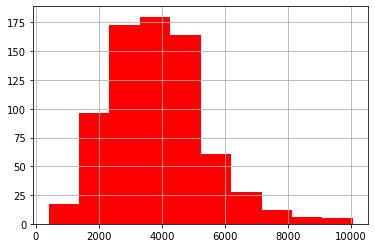

In [74]:
df['desc_len'].hist(color='red')

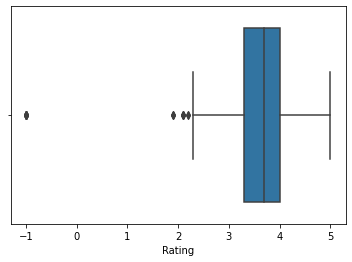

In [75]:
sns.boxplot(x='Rating',data=df)

In [76]:
df.corr()

,Rating,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len
Rating,1.000000,0.332927,0.027190,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.021655,0.144665,-0.004472,0.156982,0.117049,-0.036466,-0.012281
Founded,0.332927,1.000000,0.191265,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.134682,0.103183,0.016045,0.066978,-0.011123,-0.035567,0.083119
Competitors,0.027190,0.191265,1.000000,-0.117265,-0.116665,0.076004,0.086195,0.093813,-0.102635,0.126687,0.091470,0.016765,0.069980,-0.014860,-0.031046,0.104620
hourly,-0.019531,0.049313,-0.117265,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007626,-0.193487,-0.009505,-0.098530,-0.030315,-0.099897,-0.073194
employer_provided,-0.468234,-0.312761,-0.116665,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.109288,-0.107924,-0.007961,-0.082524,-0.000685,0.074129,-0.102218
min_salary,-0.009573,-0.033999,0.076004,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.003110,0.326910,-0.042349,0.164671,0.168893,-0.075234,0.060420
max_salary,0.027344,0.006776,0.086195,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034395,0.301481,-0.041587,0.171317,0.170911,-0.067175,0.075634
avg_salary,0.013492,-0.015149,0.093813,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019655,0.327796,-0.040000,0.176559,0.171379,-0.057252,0.078808
same_state,0.085033,0.171512,-0.102635,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.166680,0.006975,-0.058407,-0.053139,-0.065070,0.106026,0.062387
age,0.021655,0.134682,0.126687,0.007626,-0.109288,0.003110,0.034395,0.019655,-0.166680,1.000000,-0.099160,-0.016533,-0.102788,-0.033081,0.039033,0.163911


In [77]:
corr1=df[['age','avg_salary','Rating','desc_len']].corr()

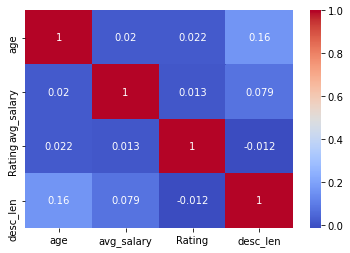

In [78]:
sns.heatmap(corr1,annot=True,cmap='coolwarm')

In [87]:
df_category=df[['Location', 'Headquarters', 'Size','Type of ownership','Industry', 'Sector', 'Revenue','company text', 'job_state','same_state','python_yn','r_yn','spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority']]

graph for Location: total = 200


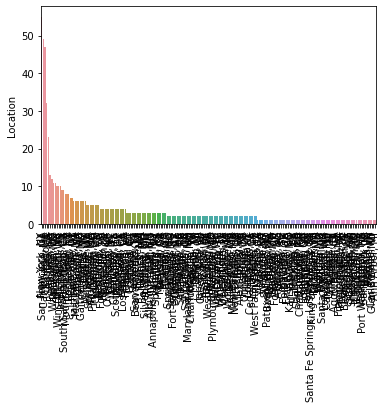

graph for Headquarters: total = 198


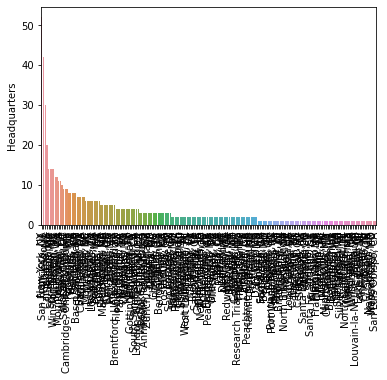

graph for Size: total = 9


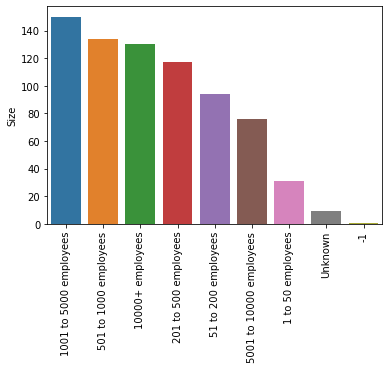

graph for Type of ownership: total = 11


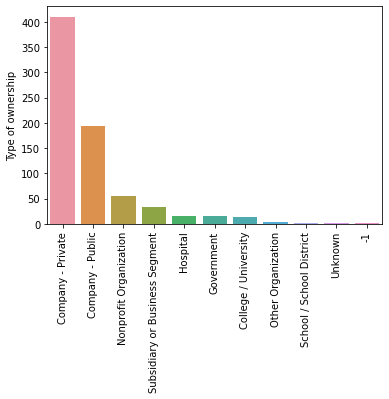

graph for Industry: total = 60


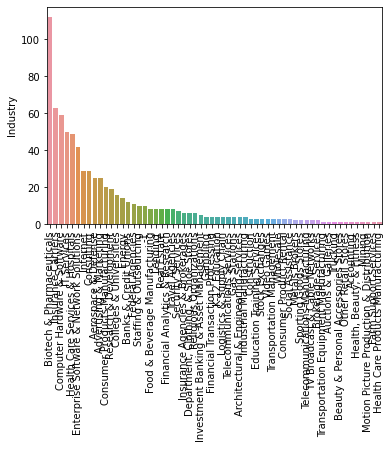

graph for Sector: total = 25


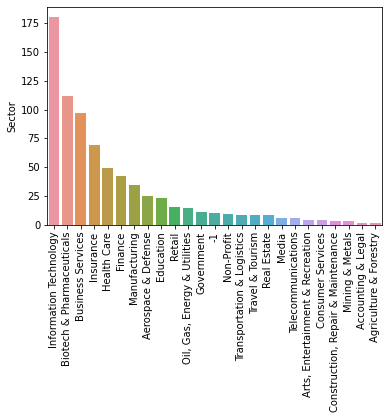

graph for Revenue: total = 14


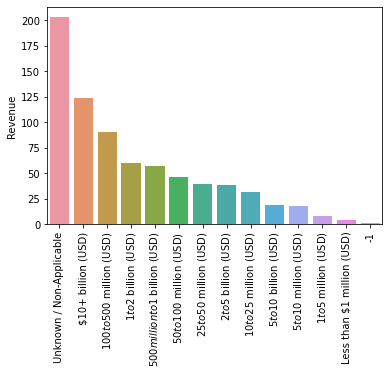

graph for company text: total = 341


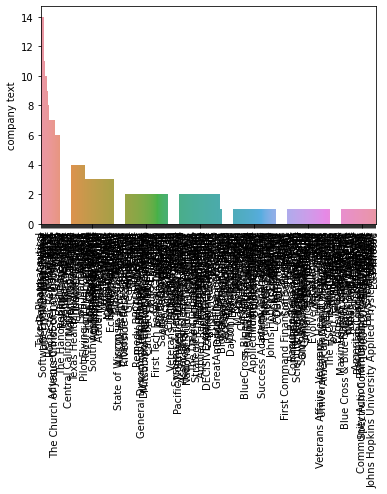

graph for job_state: total = 37


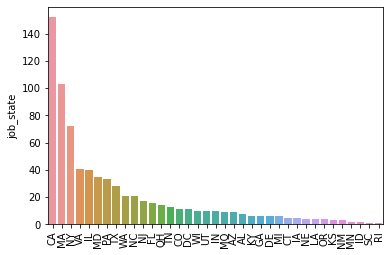

graph for same_state: total = 2


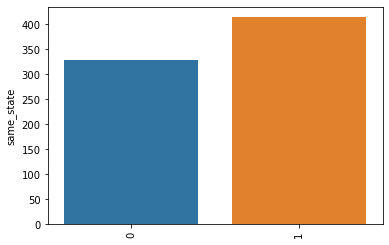

graph for python_yn: total = 2


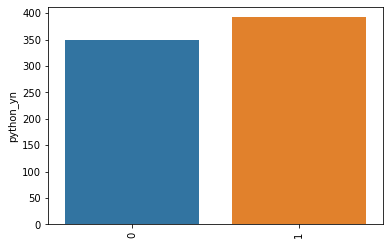

graph for r_yn: total = 2


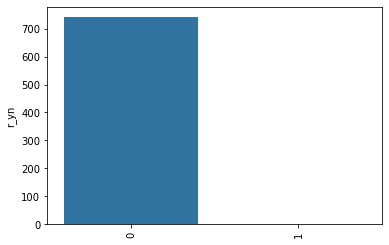

graph for spark_yn: total = 2


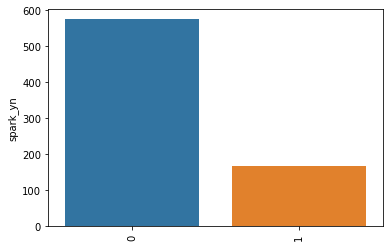

graph for aws_yn: total = 2


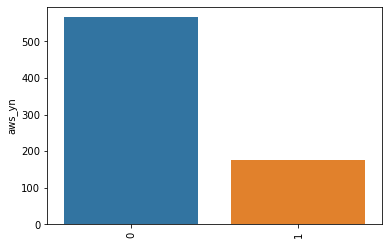

graph for excel_yn: total = 2


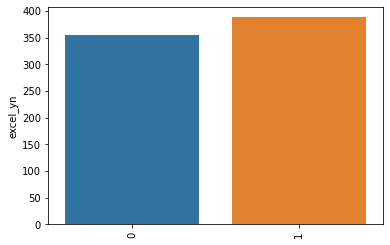

graph for job_simplified: total = 7


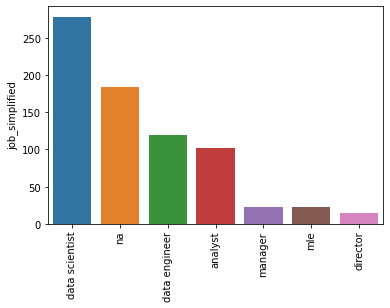

graph for seniority: total = 3


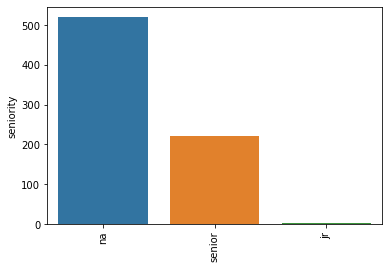

In [94]:
for i in df_category.columns:
    cat_num = df_category[i].value_counts()
    print("graph for {}: total = {}".format(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Here we can notice that Location,Headquarters and Company text have so much labels that it becomes difficult for someone to identify..Therefor we are going to plot them again..but only first 20

graph for Location: total = 20


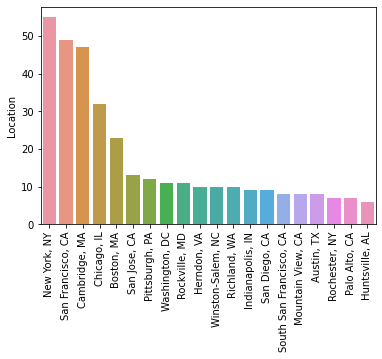

graph for Headquarters: total = 20


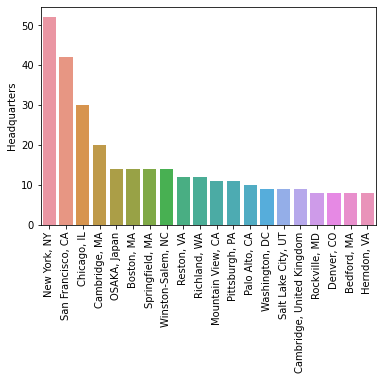

graph for company text: total = 20


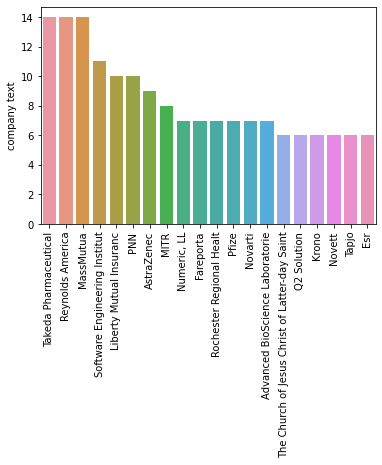

In [95]:
for i in df_category[['Location','Headquarters','company text']].columns:
    cat_num = df_category[i].value_counts()[:20]
    print("graph for {}: total = {}".format(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [106]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority',
       'desc_len'],
      dtype='object')

In [113]:
pd.pivot_table(df,index='job_simplified',values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [114]:
pd.pivot_table(df,index=['job_simplified','seniority'],values='avg_salary')

avg_salary
job_simplified seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [120]:
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [125]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
#It displays the whole datagrame without any truncation(without any limit)

In [127]:
pd.pivot_table(df,index=['job_state','job_simplified'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending=False)

avg_salary
job_state job_simplified            
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [133]:
pd.pivot_table(df[df['job_simplified']=='data scientist'],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)
#It gives the average salary of data scientist in different job states

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [134]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified', 'seniority',
       'desc_len'],
      dtype='object')

In [136]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [142]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [144]:
pd.pivot_table(df_pivots,index='Revenue',values='avg_salary',aggfunc='count')

,avg_salary
Revenue,
$1 to $2 billion (USD),60
$1 to $5 million (USD),8
$10 to $25 million (USD),32
$10+ billion (USD),124
$100 to $500 million (USD),91
$2 to $5 billion (USD),39
$25 to $50 million (USD),40
$5 to $10 billion (USD),19
$5 to $10 million (USD),18


In [145]:
pd.pivot_table(df_pivots,index='Revenue',values='avg_salary',columns='python_yn',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [150]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

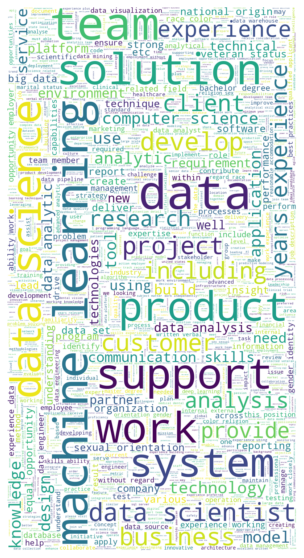

In [152]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()